In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
mlb = pd.read_csv("mlbPayroll2022.txt")
mlb = mlb.drop("Unnamed: 0", axis = 1)
#The last player has missing data and since we have 841 more entries, it's okay not to include him in the this analysis
mlb = mlb[0:841]


In [27]:
mlb["Salary"] = mlb["Adj. Salary"].str.replace('$', '')
mlb["Salary"] = mlb["Salary"].str.replace(',', '')
mlb["Salary"] = mlb["Salary"].astype(float)
mlb = mlb.drop("Adj. Salary", axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
#making a numeric for the Status Levels in order to calculate correlations; this is for the purpose of this EDA only, 
#my full statistical analysis will attempt to do a better fit than the one I'm trying here. 

mlb["Status Levels"] = mlb["Status"]
for i in mlb["Status Levels"]:
  if i == "Pre-Arb":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Pre-Arb", "1")
  if i == "Arb 1":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Arb 1", "2")
  if i == "Arb 2":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Arb 2", "3")
  if i == "Arb 3":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Arb 3", "4")
  if i == "Arb 4":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Arb 4", "5")
  if i == "Vet":
    mlb["Status Levels"] = mlb["Status Levels"].str.replace("Vet", "6")

mlb["Status Levels"] = mlb["Status Levels"].astype(float)


In [101]:
#mlb

In [96]:
#In case you wanted to the boxplots
#sns.boxplot(mlb["Salary"], mlb["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"])
#plt.xlabel("Salary in Millions")
#plt.title("Player Salary by Status")

In [95]:
#In case you wanted to see the boxplot
#sns.boxplot(mlb["Salary"], mlb["Pos."])
#plt.xlabel("Salary in Millions")
#plt.ylabel("Player Position")
#plt.title("Player Salary by Position")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Player Salary by Arbitration Status')

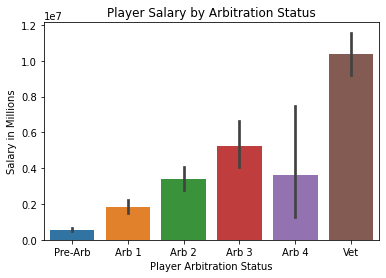

In [97]:
sns.barplot(mlb["Status"], mlb["Salary"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"])
plt.ylabel("Salary in Millions")
plt.xlabel("Player Arbitration Status")
plt.title("Player Salary by Arbitration Status")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Player Salary by Position')

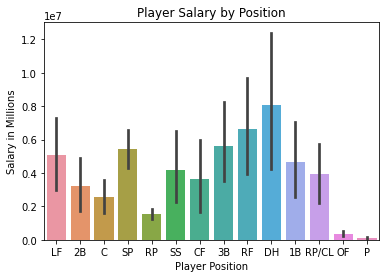

In [98]:
sns.barplot(mlb["Pos."], mlb["Salary"])
plt.ylabel("Salary in Millions")
plt.xlabel("Player Position")
plt.title("Player Salary by Position")

Text(0.5, 1.0, 'Correlation between Player Age, Salary, and Arbitration Status')

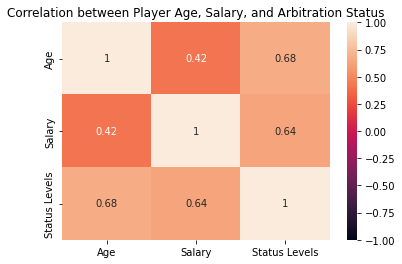

In [100]:
heatmap = sns.heatmap(mlb.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation between Player Age, Salary, and Arbitration Status")

In [50]:
firstbase = mlb[(mlb["Pos."] == "1B")]
shortstop = mlb[(mlb["Pos."] == "SS")]
centerfield = mlb[(mlb["Pos."] == "CF")]
catcher = mlb[(mlb["Pos."] == "C")]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

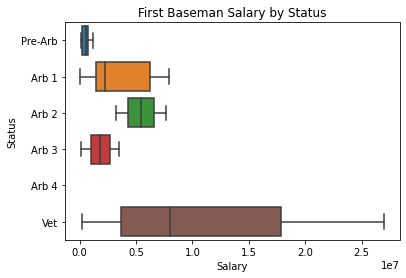

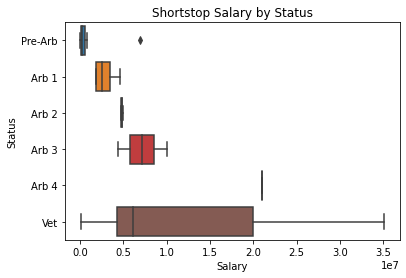

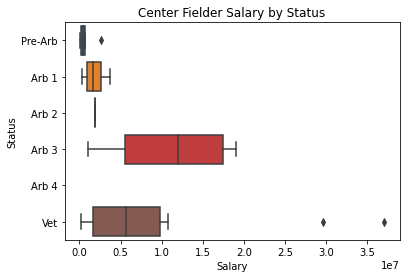

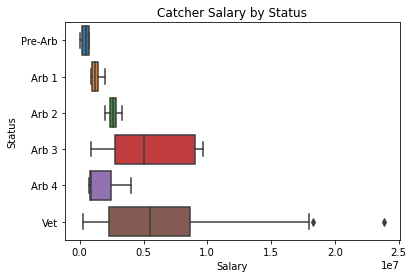

In [133]:
plt.figure(1)
plt.xlabel("Salary in Millions")
plt.title("First Baseman Salary by Status")
plt.ylabel("Arbitration Status")
plt.subplot(sns.boxplot(firstbase["Salary"], firstbase["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"]))

plt.figure(2)
plt.xlabel("Salary in Millions")
plt.title("Shortstop Salary by Status")
plt.ylabel("Arbitration Status")
plt.subplot(sns.boxplot(shortstop["Salary"], shortstop["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"]))

plt.figure(3)
plt.xlabel("Salary in Millions")
plt.title("Center Fielder Salary by Status")
plt.ylabel("Arbitration Status")
plt.subplot(sns.boxplot(centerfield["Salary"], centerfield["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"]))

plt.figure(4)
plt.xlabel("Salary in Millions")
plt.title("Catcher Salary by Status")
plt.ylabel("Arbitration Status")
plt.subplot(sns.boxplot(catcher["Salary"], catcher["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"]))

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


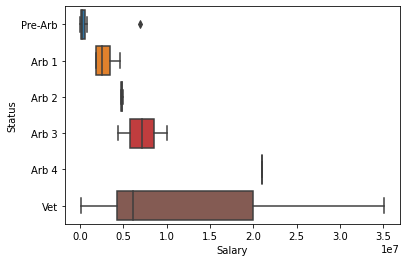

In [114]:
sns.boxplot(shortstop["Salary"], shortstop["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


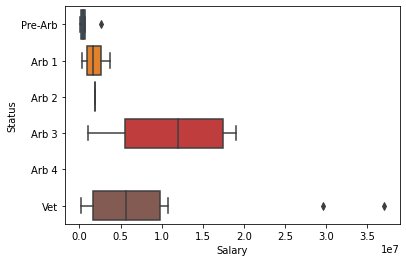

In [113]:
sns.boxplot(centerfield["Salary"], centerfield["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


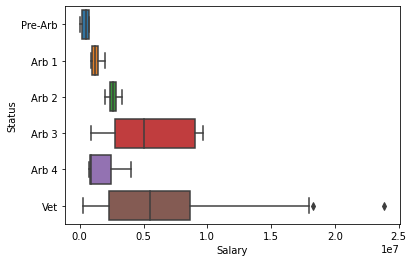

In [112]:
sns.boxplot(catcher["Salary"], catcher["Status"], order = ["Pre-Arb", "Arb 1", "Arb 2", "Arb 3", "Arb 4", "Vet"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Salary in Millions')

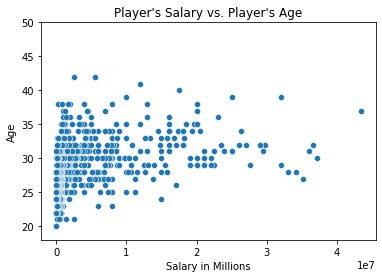

In [78]:
sns.scatterplot(mlb["Salary"], mlb["Age"])
plt.ylim(18, 50)
plt.title("Player's Salary vs. Player's Age")
plt.xlabel("Salary in Millions")

Text(6.674999999999997, 0.5, 'Salary in Millions')

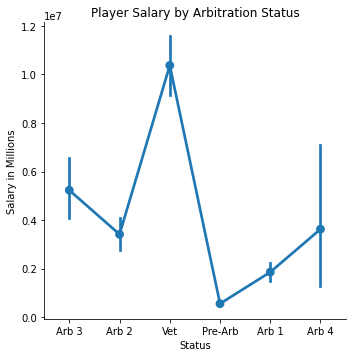

In [111]:
sns.catplot(data=mlb, x="Status", y="Salary", kind="point")
plt.title("Player Salary by Arbitration Status")
plt.ylabel("Salary in Millions")

Text(0.5, 6.79999999999999, 'Player Position')

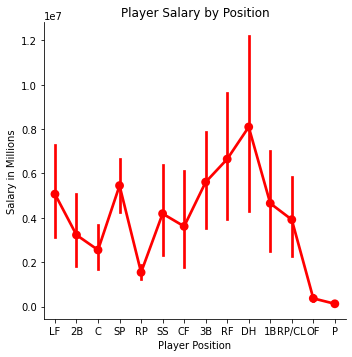

In [86]:
sns.catplot(data=mlb, x="Pos.", y="Salary", color = "red", kind="point")
plt.title("Player Salary by Position")
plt.ylabel("Salary in Millions")
plt.xlabel("Player Position")

Text(0.5, 6.79999999999999, 'Player Position')

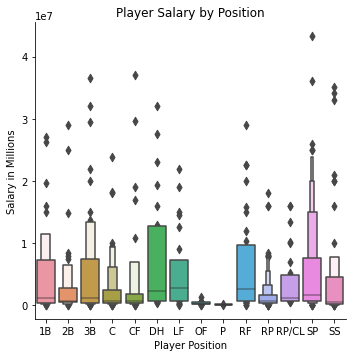

In [85]:
#sns.catplot(data = mlb.sort_values("Pos."), x ="Pos.", y ="Salary", kind="boxen")
#plt.title("Player Salary by Position")
#plt.ylabel("Salary in Millions")
#plt.xlabel("Player Position")

In [35]:
#mlb.loc[(mlb["Active Players"] == "Cody Bellinger")]

,Active Players,Age,Pos.,Status,Salary,Status Levels
145,Cody Bellinger,26,CF,Arb 3,17000000.0,4.0
